In [34]:
import os
from pathlib import Path

directory = "../data/raw/"
filenames = []

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)  # Полный путь к файлу
    if os.path.isfile(file_path):  # Проверка, что это файл (не папка)
        # if "Aguiar_Gopinath_2007" in filename:
        filenames.append("../data/raw/" + filename)
filenames[-5:]

['../data/raw/Gali_2008_chapter_2_31026304.csv',
 '../data/raw/Gali_2008_chapter_2_3211177c.csv',
 '../data/raw/Gali_2008_chapter_2_c560dfb3.csv',
 '../data/raw/Gali_2008_chapter_2_1a5dbf3c.csv',
 '../data/raw/Gali_2008_chapter_2_ca705a97.csv']

In [35]:
import pandas as pd

raw_data = pd.read_csv("../data/raw/Gali_2008_chapter_2_31026304.csv")
raw_data.head()

,Consumption,Real Wage,Inflation,AR(1) Technology Process,Hours Worked,Nominal Interest Rate,Real Interest Rate,Output,Money Growth,eps_A
0,0.866851,0.709572,1.000000,1.0,0.80507,0.937207,0.937207,0.866851,0.000000,0.0
1,0.866851,0.709572,1.003847,1.0,0.80507,0.942299,0.937207,0.866851,-0.071370,0.0
2,0.866851,0.709572,1.005433,1.0,0.80507,0.944399,0.937207,0.866851,-0.013974,0.0
3,0.866851,0.709572,1.007674,1.0,0.80507,0.947371,0.937207,0.866851,-0.019718,0.0
4,0.866851,0.709572,1.010845,1.0,0.80507,0.951580,0.937207,0.866851,-0.027822,0.0


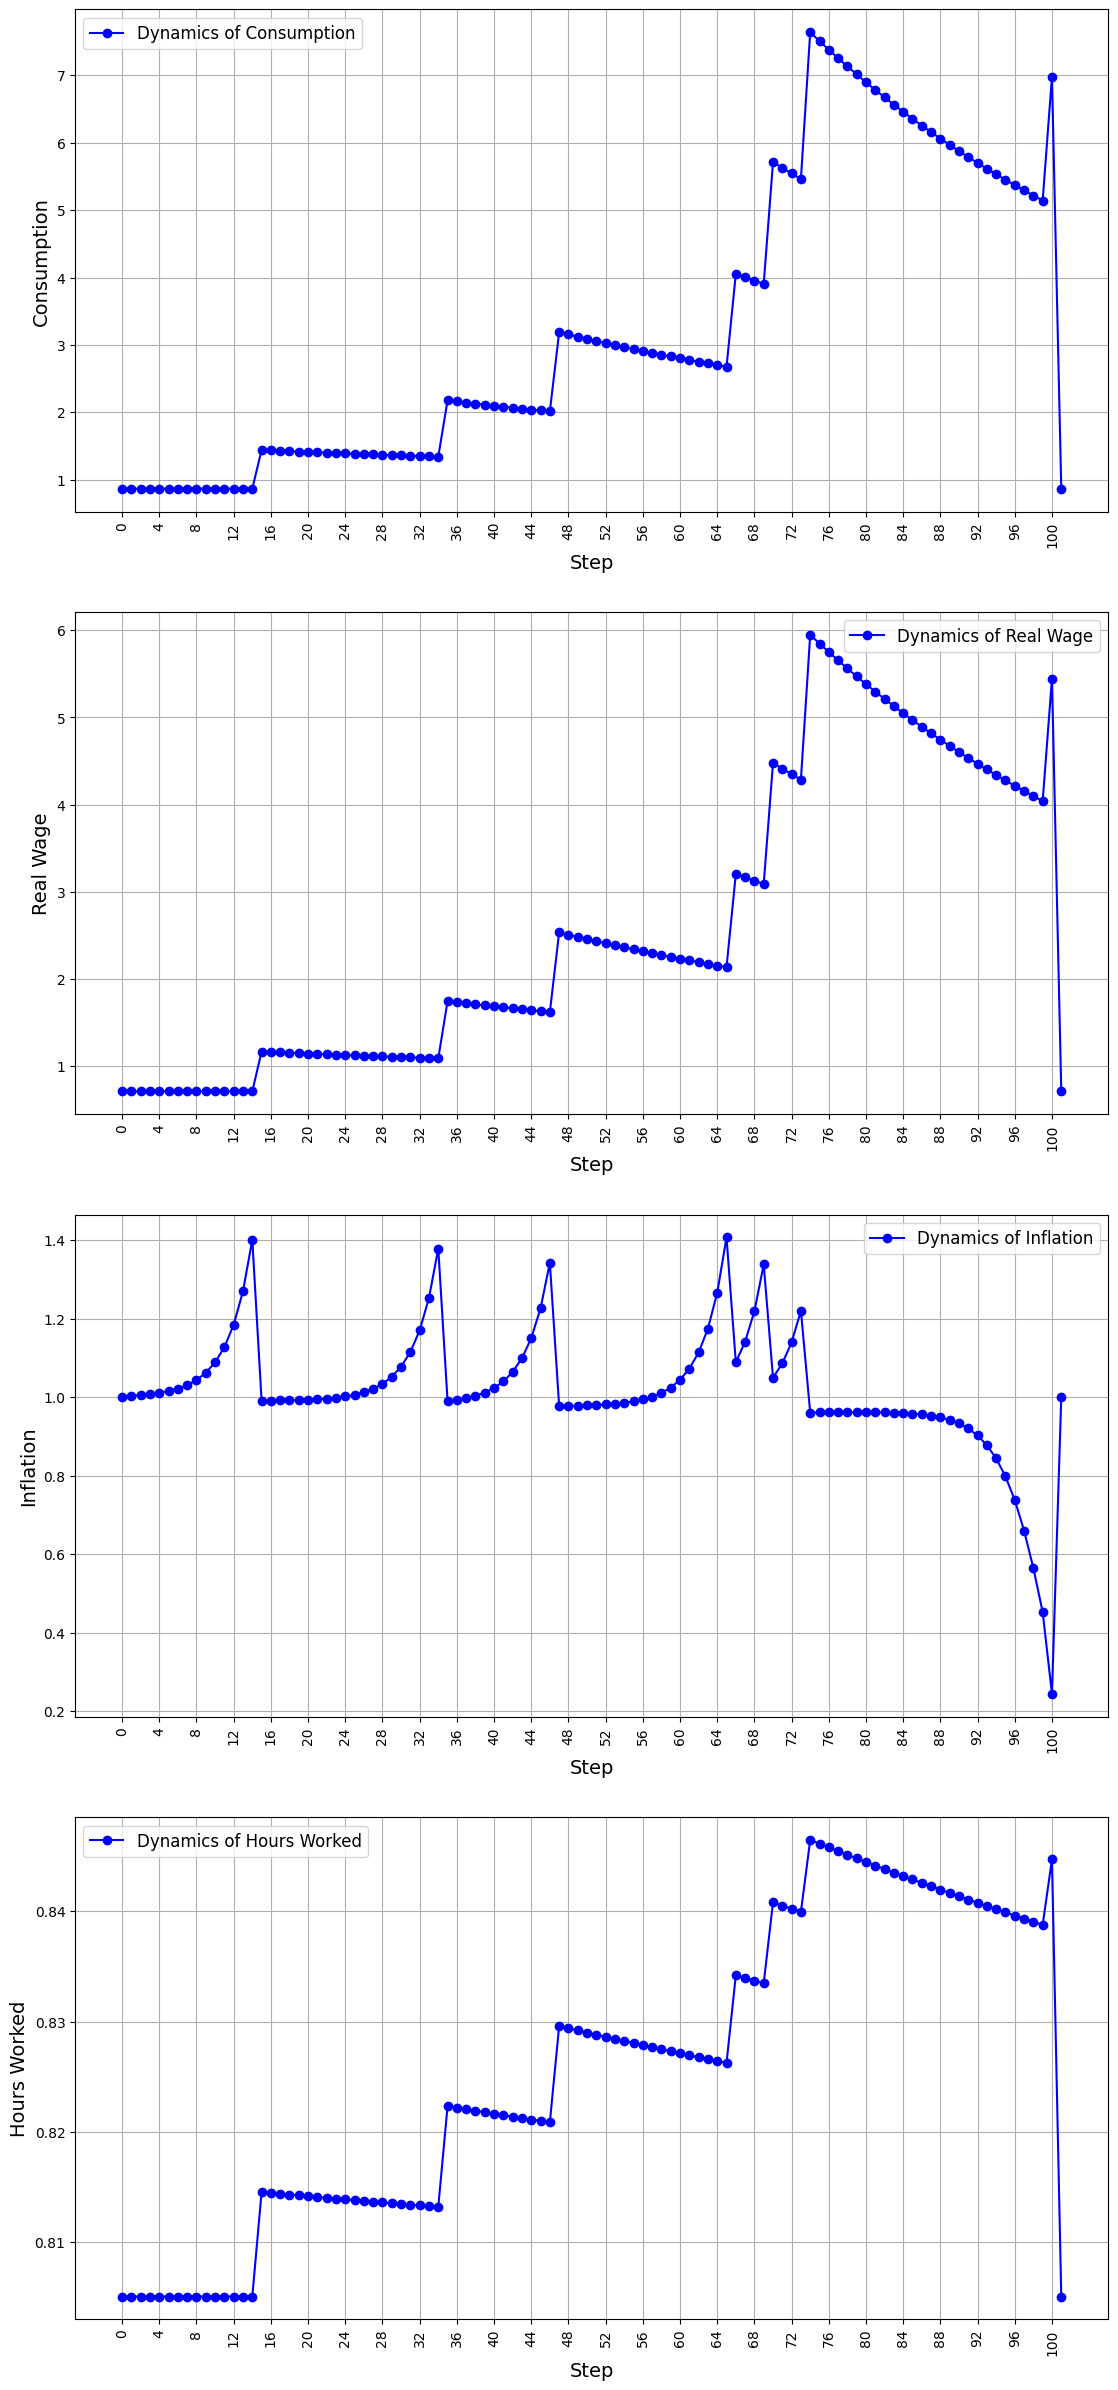

In [36]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Real Wage", "Inflation", "Hours Worked"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)

In [37]:
import pandas as pd
import numpy as np

def calculate_utility(df: pd.DataFrame, beta: float, sigma: float, phi: float) -> pd.Series:
    """
    Рассчитывает ожидаемую дисконтированную полезность для каждого шага симуляции.
    
    :param df: DataFrame с данными симуляции.
    :param beta: Коэффициент дисконтирования.
    :param sigma: Параметр неприятия риска.
    :param phi: Параметр эластичности предложения труда.
    :return: Series с ожидаемой полезностью для каждого шага.
    """
    # Извлекаем данные
    C = df['Consumption'].values  # Потребление
    N = df['Hours Worked'].values  # Отработанные часы
    T = len(C)  # Количество периодов

    # Вектор для хранения полезности
    utility = np.zeros(T)

    # Рассчитываем полезность для каждого шага
    for t in range(T):
        # Сумма полезностей для всех будущих периодов
        discounted_sum = 0.0
        for s in range(T - t):
            # Полезность в периоде t+s
            if sigma == 1:
                u_t_s = np.log(C[t + s]) - (N[t + s] ** (1 + phi)) / (1 + phi)
            else:
                u_t_s = (C[t + s] ** (1 - sigma)) / (1 - sigma) - (N[t + s] ** (1 + phi)) / (1 + phi)
            
            # Дисконтированная полезность
            discounted_sum += (beta ** s) * u_t_s
        
        # Сохраняем результат
        utility[t] = discounted_sum

    return pd.Series(utility, index=df.index)



raw_data["Utility"] = calculate_utility(raw_data, beta=0.90, sigma=1.0, phi=0.7)

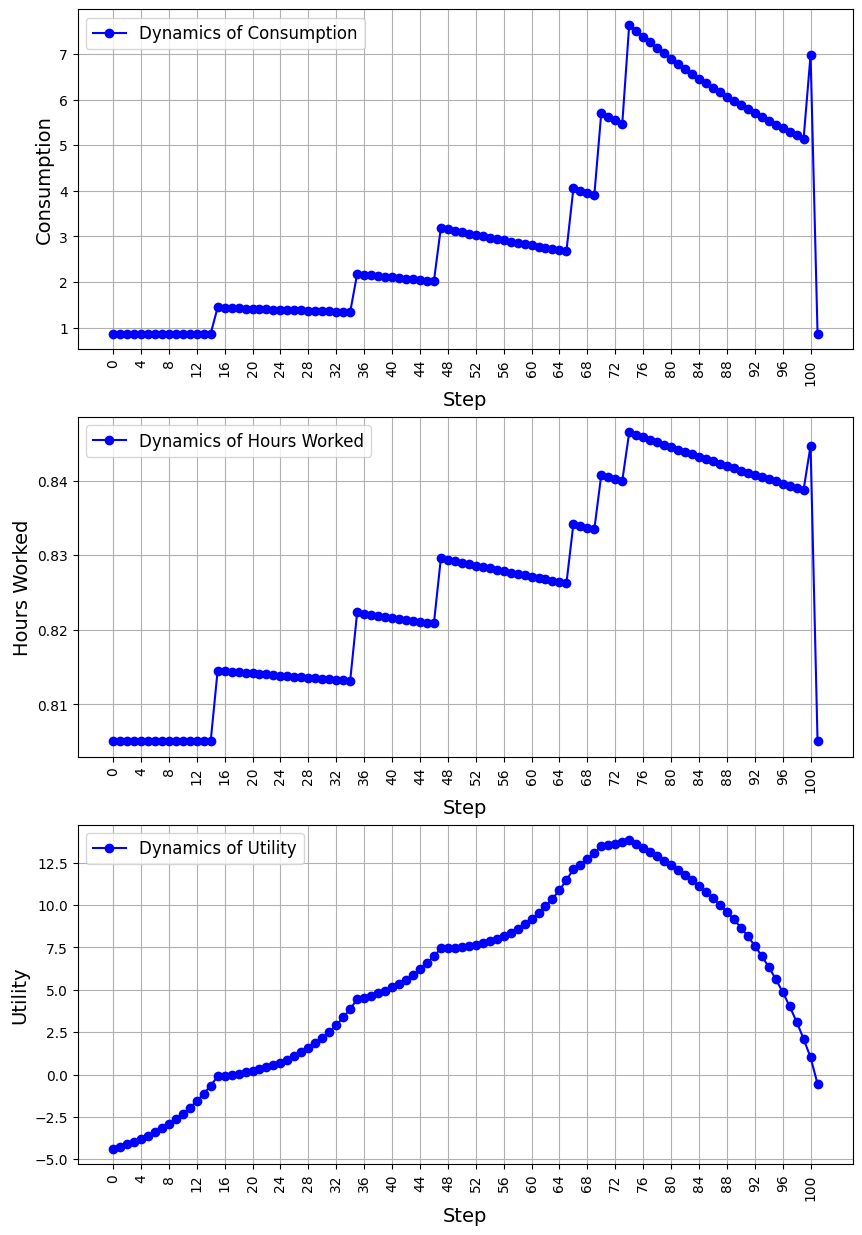

In [38]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Consumption", "Hours Worked", "Utility"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)

In [43]:
import os
from pathlib import Path

directory = "../data/processed/"
filenames = []

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)  # Полный путь к файлу
    if os.path.isfile(file_path):  # Проверка, что это файл (не папка)
        # if "Aguiar_Gopinath_2007" in filename:
        filenames.append("../data/processed/" + filename)
filenames[-5:]

['../data/processed/Gali_2008_chapter_2_93a7f7a4b5b53df2.parquet',
 '../data/processed/Gali_2008_chapter_2_a333e3e5dd1a1a78.parquet',
 '../data/processed/Gali_2008_chapter_2_ae72862d15ff9e69.parquet',
 '../data/processed/Gali_2008_chapter_2_807c14981c5f6ac8.parquet',
 '../data/processed/Gali_2008_chapter_2_583f49d02d6a68e8.parquet']

In [44]:
processed_data = pd.read_parquet("../data/processed/Gali_2008_chapter_2_93a7f7a4b5b53df2.parquet")
processed_data.head()

,state,action,truncated,info,n_schocks,reward,action_description,state_description
0,"[0.8641977733500714, 0.6663225960017698, 1.0, ...",[0.12580305299636851],False,{'eps_A': 0.0},6,-2.791771,[Nominal Interest Rate],"[Consumption, Real Wage, Inflation, AR(1) Tech..."
1,"[0.8641977733500714, 0.6663225960017697, 1.078...",[0.07586689417526671],False,{'eps_A': 0.0},6,-2.539662,[Nominal Interest Rate],"[Consumption, Real Wage, Inflation, AR(1) Tech..."
2,"[0.8641977733500714, 0.6663225960017697, 1.124...",[0.12777903877840813],False,{'eps_A': 0.0},6,-2.259540,[Nominal Interest Rate],"[Consumption, Real Wage, Inflation, AR(1) Tech..."
3,"[0.8641977733500713, 0.6663225960017698, 1.198...",[0.22525810987194528],False,{'eps_A': 0.0},6,-1.948294,[Nominal Interest Rate],"[Consumption, Real Wage, Inflation, AR(1) Tech..."
4,"[0.8641977733500198, 0.6663225960017294, 1.324...",[-0.653163750961053],False,{'eps_A': 0.5},6,-1.602465,[Nominal Interest Rate],"[Consumption, Real Wage, Inflation, AR(1) Tech..."


In [45]:
processed_data["state_description"].iloc[0]

array(['Consumption', 'Real Wage', 'Inflation',
       'AR(1) Technology Process', 'Hours Worked',
       'Nominal Interest Rate', 'Real Interest Rate', 'Output',
       'Money Growth'], dtype=object)